# Задание от 21.02.2025

Безопасное использование итераторов, что это?

itertools, types, ctypes, collections.abc

Что с чем применять в каких ситуациях?
Когда это будет безопасно.

### Самый главный. Что такое безопасность в итераторах?

Как я буду использовать:
itertools, types, ctypes, collections.abc

Как я узнаю и проверю, что это безопасно?

## Наша работа сейчас:

**Берётся реальный проект и человек пишет реальный код.**

**Работа с реальным профессиональным кодом.**

**Работа с абстракциями.**

**Работа над оттачиваем технологий.**

## Нам нужно закончить итераторы и довести до принятия решения.

Итератор. В нашем понятии это что? `__iter__ and __next__`

С чего начать. 

Почему и что применяем./опора на доки.

Модель языка и определение итератора.

itertools, types, ctypes, collections.abc

*отделить for*

Порядок работы с доками Питон.

Полуфабрикаты.

контролировать тип/значение. Вывод.


# Ответ

## Создание итератора. Функция iter.

Когда речь заходит об итераторах всегда возникает вопрос - для чего он нужен?
Итератор нужен для поочередного перебора элементов в контейнере.
Особенность итератора в том, что он перебирает элементы в контейнере от первого к последнему,
для упорядочных контейнеровю. Для не упорядочных, перебирает все элементы в случайном порядке.
Есть еще реверсивный итератор который перебирает элементы от конца к началу, но это уже поддерживают
только упорядоченные контейнеры.

Что такое контейнер? Это тип данных. Который может быть встроенным или пользовательским.
Каким свойством/функциональностью должен обладать контейнер, что бы он поддерживал перебор/итерацию
по своим элементам.? Ответ в документации:

https://docs.python.org/3/library/stdtypes.html#iterator-types

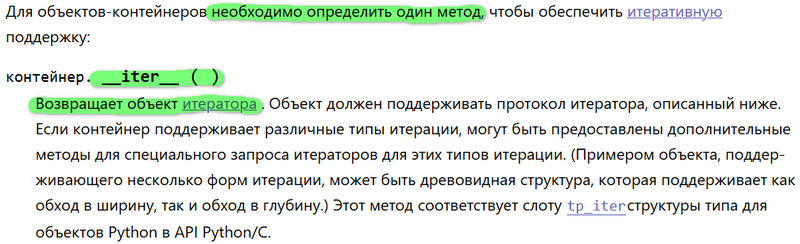

Таким образом контейнер становится итерируемым когда он реализует метод __iter__, при условии что он возвращант объект **поддерживающий протокол итератора** (описание протокола ниже).

Примеры встроенных типов данных поддерживающих итерацию: str, list, set, dict, tuple

Чтобы понять поддерживает определенный тип данных итерацию, необходимо проверить наличие у него дандер метода __iter__.

```python
print(hasattr(list, '__iter__')) # True
print(hasattr(int, '__iter__')) # False
```
Для экземпляров мы можем использовать тот же способ проверки метода __iter__ или попытаться создать итератор и если не произойдет исключения, то экземпляр итеририруемый.

```python
a = [1,2,3]
print(hasattr(a, '__iter__')) # True
b = 1
print(hasattr(b, '__iter__')) # False

try:
    iter(b)
except Exception as e:
    print(e) # 'int' object is not iterable
```

Рассмотрим встроенную функцию **iter**. Эта функция создает экземпляр итератора для экземпляра встроенных типов данных. При этом экземпляр итератора создается под конкретный тип данных.

```python
string = "abcdefg"
it_string = iter(string)
# Экземпляр итератора
print(it_string) # <str_ascii_iterator object at 0x00000235C3193670>
# Тип итератора
print(type(it_string)) # <class 'str_ascii_iterator'>

list_str = list['a','b','c']
it_list_str = iter(list_str)
# Экземпляр итератора
print(it_list_str) # <generic_alias_iterator object at 0x00000235C31921A0>
# Тип итератора
print(type(it_list_str)) # <class 'generic_alias_iterator'>

set_str = set(list_str)
# Экземпляр итератора
it_set_str = iter(set_str)
# Экземпляр итератора
print(it_set_str) # <set_iterator object at 0x00000235C3563F40>
# Тип итератора
print(type(it_set_str)) # <class 'set_iterator'>
```
Пример использования в коде:

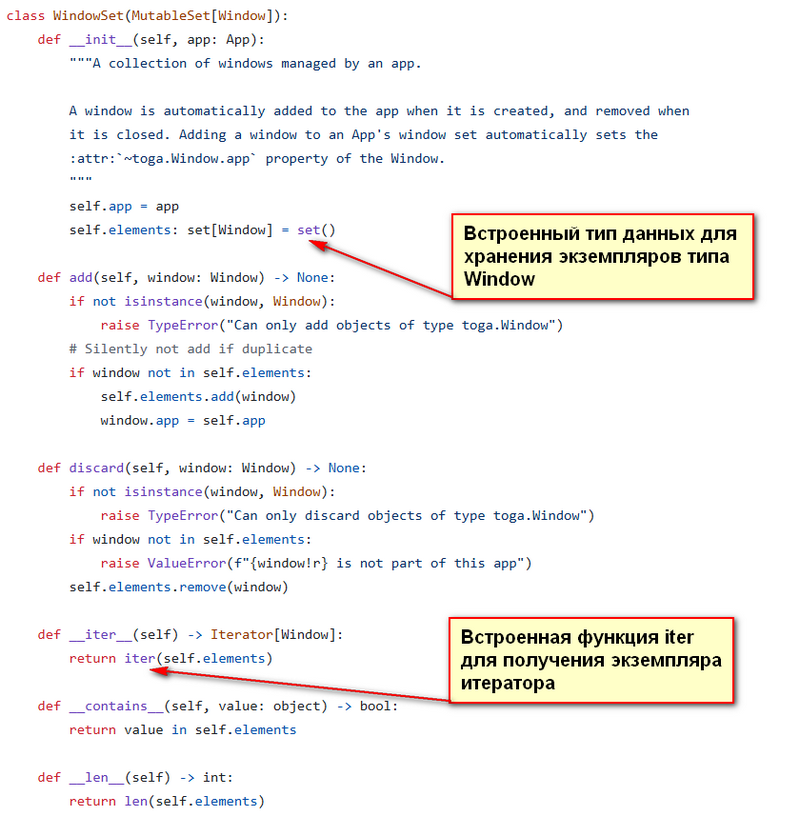


## itertools

Для более сложных вариантов итерации по итеририруемым типам данных в python
есть библиотека itertools.

https://docs.python.org/3/library/itertools.html#module-itertools

Это пример одного из многочисленных итераторов представленных в данной библиотеке.

```python
from itertools import chain
a = [1,2,3]
b = [4,5,6]
c = [7,8,9]
it = chain(a,b,c)
# Экземпляр итератора
print(it) # <itertools.chain object at 0x00000235C3192EC0>
# Тип итератора
print(type(it)) # <class 'itertools.chain'>
# Результат выполнения
print(list(it)) # [1, 2, 3, 4, 5, 6, 7, 8, 9]
```

## Протокол итератора. Пользовательский итератор.

https://docs.python.org/3/library/stdtypes.html#iterator-types

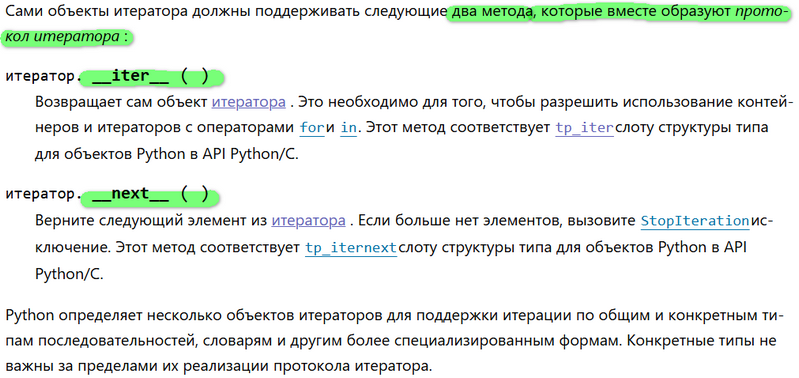

Согласно документации итератор это такой объект который реализует два метода: __iter__ и __next__ (следует отметить, что для итеририруемого объекта есть одноименный метод __iter__, но он вызывает "внешний" итератор.).

Для встроенной функции iter и итераторов библиотеки itertools эти методы реализованы.

Если необходимо итерироваться по более сложным пользовательским типам как связанные списки, деревья, то может
возникнуть необходимость в пользовательском итераторе.

Пример пользовательского итератора:

```python
"""Создание пользовательского итератора для множества (set)"""
class MyIterator(Iterator):

    def __init__(self, obj):
        self.obj = obj
        self.index = 0

    def __next__(self):
        if self.index < len(self.obj):
            self.index += 1
            # Дополнительное преобразование в список для доступа по индексу в множестве
            return list(self.obj)[self.index-1] 
        raise StopIteration("Конец итерации.")

    def __iter__(self):
        return self
```
Пример реализации метода __iter__ в итеририруемом объекте с рассмотренными видами итераторов:

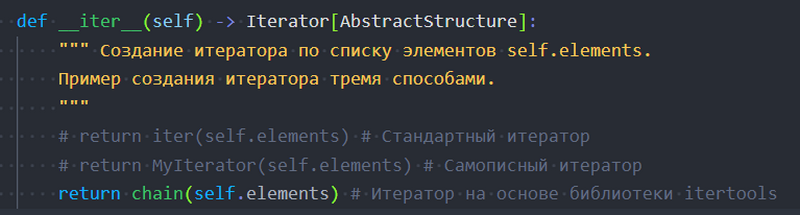

### Интересный вопрос. Зачем в итераторе метод __iter__ ?

Этот метод возвращает сам себя. Зачем?

Это делает из итератора итеририруемый объект или наоборот - в итеририруемый объект добавляется функциональность
итеририрования по самому себе. Как пример генератор последовательностей - range.

Самописный my_range:

```python
class my_range():
    def __init__(self, stop):
        self.stop = stop
        self.current = 0

    def __iter__(self):
        # self.current = 0
        return self

    def __next__(self):
        if self.current < self.stop:
            x = self.current
            self.current += 1
            return x
        raise StopIteration


for i in my_range(5):
    print(i)

print(list(my_range())) # [0, 1, 2, 3, 4]

# Инициализация экземпляра класса my_range
a = my_range(5)
# Является экземпляр 'a' итератором без создания итератора
print(hasattr(a, '__iter__'))   # True
# Можем по нему итерироваться? Итерируемый объект?
print(hasattr(a, '__next__'))   # True
print(next(a)) # 0
# Создадим итератор из экземпляра 'a
it = iter(a)
# Это тот же объект что и 'a'
print(it is a)  # True
# Что вернет итератор 'it' при следующем next?
print(next(it)) # 1 - продолжает работу экземпляра 'a'
print(next(a)) # 2 - продолжает работу экземпляра 'a'
print(next(it)) # 3 - продолжает работу экземпляра 'a'
print(next(a)) # 4 - продолжает работу экземпляра 'a'
print(next(it)) # StopIteration
```

Как пример можно рассмотреть открытие текстового файла, где переменная 'f' одновременно
является и итерируемым объектом и итератором.

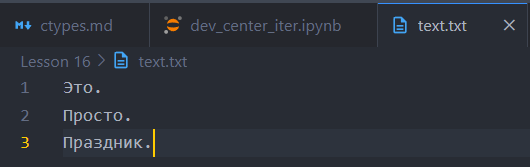

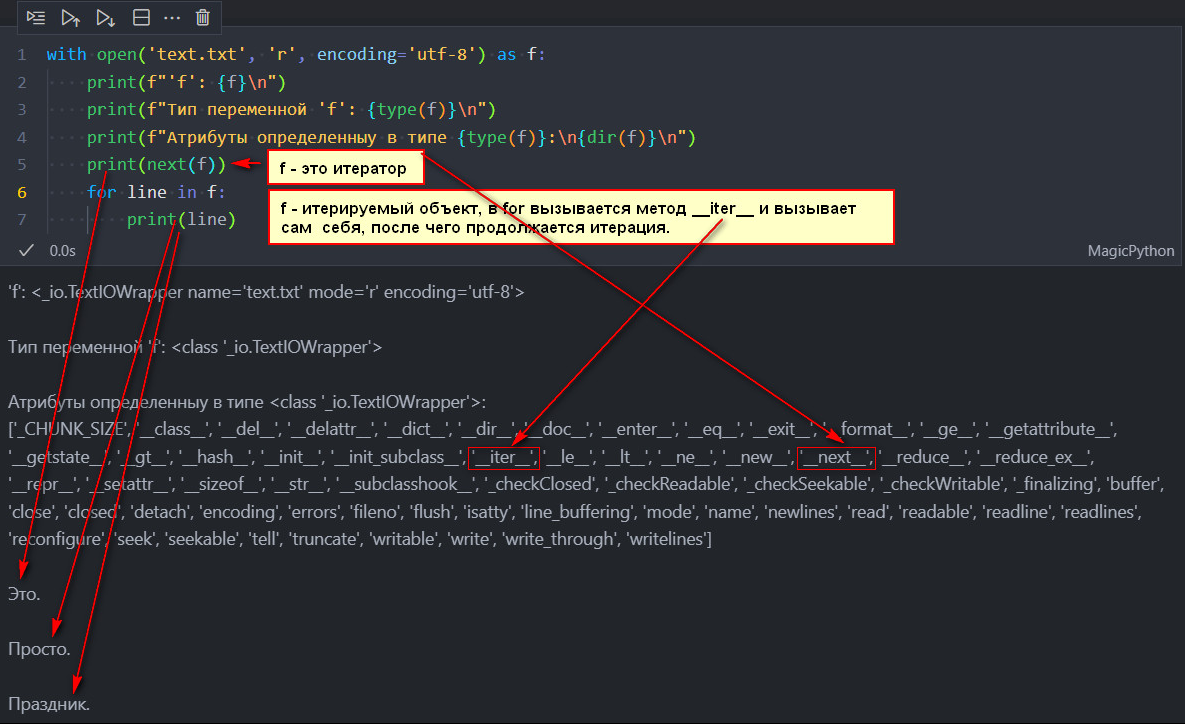

## Пользовательский тип данных. Полуфабрикаты.

В случае когда необходим пользовательский тип данных, то с начала нужно рассмотреть возможность его создания через
абстрактные классы определенные в библиотеке абстрактых классов. Это даст возможность использовать пользовательские  типы данных так же как и встроенные.

https://docs.python.org/3/library/collections.abc.html#module-collections.abc

В этой таблице показаны что нужно обязательно реализовать, а что не обязательно для тех абстрактных классов которые можно взять за основу.

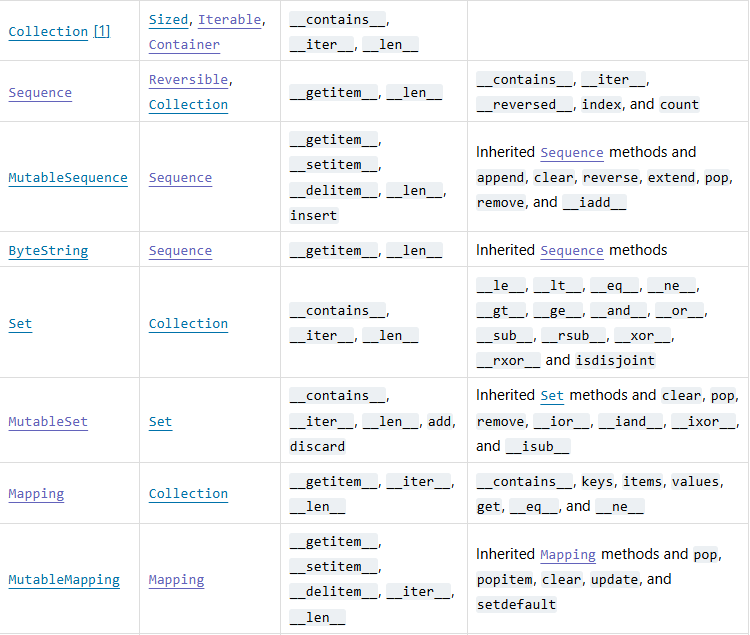

## Контролировать тип/значение. Вывод.

Здесь нужно разделить контроль между итеририруемым объектом и итератором.

У итеририруемого объекта контроль происходит на уровне вставки в контейнер, чтобы тип вставляемого экземпляра
соответствовал хранимым данным.

В моем примере apetrunin_abstract_factory происходит тройная проверка:

1. Проверка на соответсвующий тип
2. Проверка на уникальность составного описания (обеспечивает уникальность объекта).

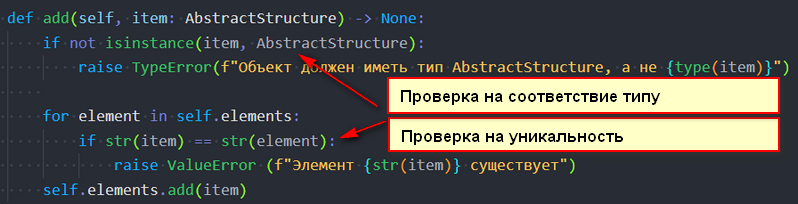

3. Идет проверка на не пустую строку в атрибуте description

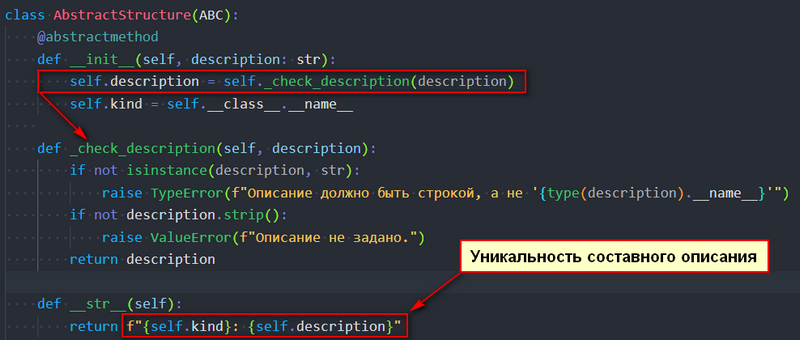

Для встроенной функции итератора iter и встроенных типов контроль происходит при использовании
**полиморфизма**, когда в записимости от типа передаваемого итерируемого объекта в качестве аргумента происходит создание того или иного экземпляра итератора соответствующего типа.

Для пользовательского итератора, который используется под соответствующий тип, проверку нужно производить на уровне
создания экземпляра итератора.

В моем примере показанном выше эту проверку не сделал. Ниже исправленный вариант

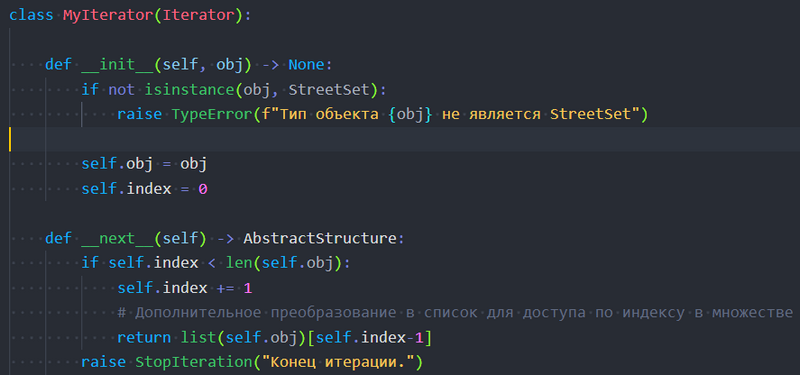



## *отделить for*

Оператор цикла **for** это один из многочисленных операторов/функций использующих "под капотом"
итератор.

Как пример (тут это спросил у чатгпт).

1. Функции работы с последовательностями
```python
result = map(str.upper, ['python', 'java'])
print(list(result))  # ['PYTHON', 'JAVA']

result = filter(lambda x: x > 0, [-1, 0, 1, 2])
print(list(result))  # [1, 2]

result = zip([1, 2, 3], ['a', 'b', 'c'])
print(list(result))  # [(1, 'a'), (2, 'b'), (3, 'c')]

result = enumerate(['apple', 'banana'])
print(list(result))  # [(0, 'apple'), (1, 'banana')]
```
2. Функции работы с данными

```python
result = sorted([3, 1, 2])
print(result)  # [1, 2, 3]

result = sum([1, 2, 3])
print(result)  # 6

result = max([1, 2, 3])
print(result)  # 3

print(any([0, 1, 0]))  # True
print(all([1, 2, 3]))  # True
```

### Ниже код используемый в тексте выше для демонстрации

In [23]:
from itertools import chain
a = [1,2,3]
b = [4,5,6]
c = [7,8,9]
it = chain(a,b,c)
# Экземпляр итератора
print(it) # <itertools.chain object at 0x00000235C3192EC0>
# Тип итератора
print(type(it)) # <class 'itertools.chain'>
# Результат выполнения
print(list(it)) # [1, 2, 3, 4, 5, 6, 7, 8, 9]

<class 'itertools.chain'>
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
print(hasattr(list, '__iter__'))
print(hasattr(int, '__iter__'))

a = [1,2,3]
print(hasattr(a, '__iter__'))
b = 1
print(hasattr(b, '__iter__'))

try:
    iter(b)
except Exception as e:
    print(e)

True
False
True
False
'int' object is not iterable
<class 'TypeError'>


In [12]:
string = "abcdefg"
it_string = iter(string)
# Экземпляр итератора
print(it_string) # <str_ascii_iterator object at 0x00000235C3193670>
# Тип итератора
print(type(it_string)) # <class 'str_ascii_iterator'>

list_str = list['a','b','c']
it_list_str = iter(list_str)
# Экземпляр итератора
print(it_list_str) # <generic_alias_iterator object at 0x00000235C31921A0>
# Тип итератора
print(type(it_list_str)) # <class 'generic_alias_iterator'>

set_str = set(list_str)
# Экземпляр итератора
it_set_str = iter(set_str)
# Экземпляр итератора
print(it_set_str) # <set_iterator object at 0x00000235C3563F40>
# Тип итератора
print(type(it_set_str)) # <class 'set_iterator'>

<class 'str_ascii_iterator'>
<class 'generic_alias_iterator'>
<class 'set_iterator'>


In [56]:
class my_range():
    def __init__(self, stop):
        self.stop = stop
        self.current = 0

    def __iter__(self):
        # self.current = 0
        return self

    def __next__(self):
        if self.current < self.stop:
            x = self.current
            self.current += 1
            return x
        raise StopIteration('Конец итерации.')


for i in my_range(5):
    print(i)

print(list(my_range(5))) # [0, 1, 2, 3, 4]

# Инициализация экземпляра класса my_range
a = my_range(5)
# Является экземпляр 'a' итератором без создания итератора
print(hasattr(a, '__iter__'))   # True
# Можем по нему итерироваться? Итерируемый объект?
print(hasattr(a, '__next__'))   # True
print(next(a)) # 0
# Создадим итератор из экземпляра 'a
it = iter(a)
# Это тот же объект что и 'a'
print(it is a)  # True
try:
    # Что вернет итератор 'it' при следующем next?
    print(next(it)) # 1 - продолжает работу экземпляра 'a'
    print(next(a)) # 2 - продолжает работу экземпляра 'a'
    print(next(it)) # 3 - продолжает работу экземпляра 'a'
    print(next(a)) # 4 - продолжает работу экземпляра 'a'
    print(next(it)) # StopIteration
except Exception as e:
    print(e)

0
1
2
3
4
[0, 1, 2, 3, 4]
True
True
0
True
1
2
3
4
Конец итерации.


In [ ]:
a = '10'
if hasattr(a, '__iter__'):
    print('Объект итерируемый - True')
    it = iter(a)
    print(it)
    print(type(it))
    print(next(it))
    print(next(it))
    print(next(it))
    print(next(it))
else:
    print('Объект итерируемый - False')

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']
Объект итерируемый 

StopIteration: 

In [7]:
a = 10
print(dir(a))

['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'as_integer_ratio', 'bit_count', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']


In [9]:
try:
    a = 10
    it = iter(a)
    print(type(it))
    print(it)
except Exception as e:
    print(e)
    print(type(e))

'int' object is not iterable
<class 'TypeError'>


In [7]:
string = "abcdefg"
it_string = iter(string)
print(it_string)

list_int = list[1, 2, 3]
it_list_int = iter(list_int)
print(it_list_int)

list_str = list['a','b','c']
it_list_str = iter(list_str)
print(it_list_str)

set_str = set(list_str)
it_set_str = iter(set_str)
print(it_set_str)

In [31]:
from collections.abc import Iterator

class MyIterator():

    def __init__(self) -> None:
        print('init')
        self.obj = [1,2,3,4,5]
        self.index = 0

    def __next__(self) -> int:
        if self.index < len(self.obj):
            self.index += 1
            return self.obj[self.index-1]
        raise StopIteration('Конец итерации.')

    def __iter__(self):
        print('iter')
        return self

a = MyIterator()
it = iter(a)
print(id(a))
print(id(it))

print(next(a))
print(next(it))
# print(next(it))
# print(next(it))
# print(next(it))

for i in a:
    print(i)

init
iter
2322823520144
2322823520144
1
2
iter
3
4
5


In [29]:
class MyIterator():

    def __init__(self) -> None:
        print('init')
        self.obj = [1,2,3,4,5]
        self.index = 0

    def __next__(self) -> int:
        if self.index < len(self.obj):
            self.index += 1
            return self.obj[self.index-1]
        raise StopIteration('Конец итерации.')

    # def __iter__(self):
    #     print('iter')
    #     return self

a = MyIterator()
# it = iter(a)
print(id(a))
# print(id(it))

print(next(a))
# print(next(it))

init
2322823642256
1


init
iter
<class '__main__.MyIterator'>
1
2
3
4
5


In [ ]:
with open('text.txt', 'r', encoding='utf-8') as f:
    print(f"'f': {f}\n")
    print(f"Тип переменной 'f': {type(f)}\n")
    print(f"Атрибуты определенныу в типе {type(f)}:\n{dir(f)}\n")
    print(next(f))
    for line in f:
        print(line)

'f': <_io.TextIOWrapper name='text.txt' mode='r' encoding='utf-8'>

Тип переменной 'f': <class '_io.TextIOWrapper'>

Атрибуты определенныу в типе <class '_io.TextIOWrapper'>:
['_CHUNK_SIZE', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_finalizing', 'buffer', 'close', 'closed', 'detach', 'encoding', 'errors', 'fileno', 'flush', 'isatty', 'line_buffering', 'mode', 'name', 'newlines', 'read', 'readable', 'readline', 'readlines', 'reconfigure', 'seek', 'seekable', 'tell', 'truncate', 'writable', 'write', 'write_through', 'writelines']

Это.

Просто.

Праздник.


: 

# Задание от 21.02.2025

itertools, types, ctypes, collections.abc

Поставьте на первое место безопасность.
Потом поймите назначение.
И на конкретном примере итераторов, напишите, что и где будете применять.



https://solidity-by-example.org/app/iterable-mapping/